In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(356, 328)

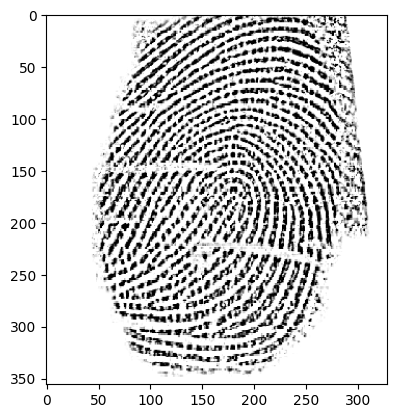

In [2]:
contact_image_raw = cv2.imread('PolyU/contact-based_fingerprints/first_session/1_1.jpg')
contact_image_gray = cv2.cvtColor(contact_image_raw, cv2.COLOR_BGR2GRAY)
# plt.imshow(image_raw)
plt.imshow(contact_image_gray, cmap='gray')
np.shape(contact_image_gray)


(225, 350, 3)


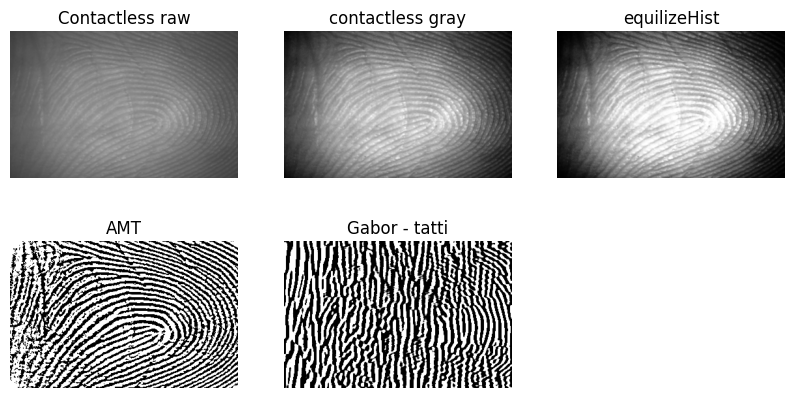

In [9]:
contactless_image_raw = cv2.imread('PolyU/processed_contactless_2d_fingerprint_images/first_session/p2/p2.bmp')
print(np.shape(contactless_image_raw))
contactless_image_gray = cv2.cvtColor(contactless_image_raw, cv2.COLOR_BGR2GRAY)

# Histogram Equi
equilized_image = cv2.equalizeHist(contactless_image_gray)
# AMT
AMT_image = cv2.adaptiveThreshold(equilized_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

#gabor
ksize = 21  # Size of the Gabor kernel
sigma = 5.0  # Standard deviation of the Gaussian envelope
theta = 0  # Orientation of the normal to the parallel stripes
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
phi = 0  # Phase offset

# Generate Gabor kernel
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
gabor_filtered = cv2.filter2D(AMT_image, cv2.CV_8UC3, gabor_kernel)


# Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(contactless_image_raw)
plt.title('Contactless raw')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(contactless_image_gray, cmap='gray')
plt.title('contactless gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(equilized_image, cmap='gray')
plt.title('equilizeHist')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(AMT_image, cmap='gray')
plt.title('AMT')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gabor_filtered, cmap='gray')
plt.title('Gabor - tatti')
plt.axis('off')

# plt.subplot(2, 2, 4)
# plt.imshow(AMT_image, cmap='gray')
# plt.title('contactless gray adaptive thresholded')
# plt.axis('off')

plt.show()

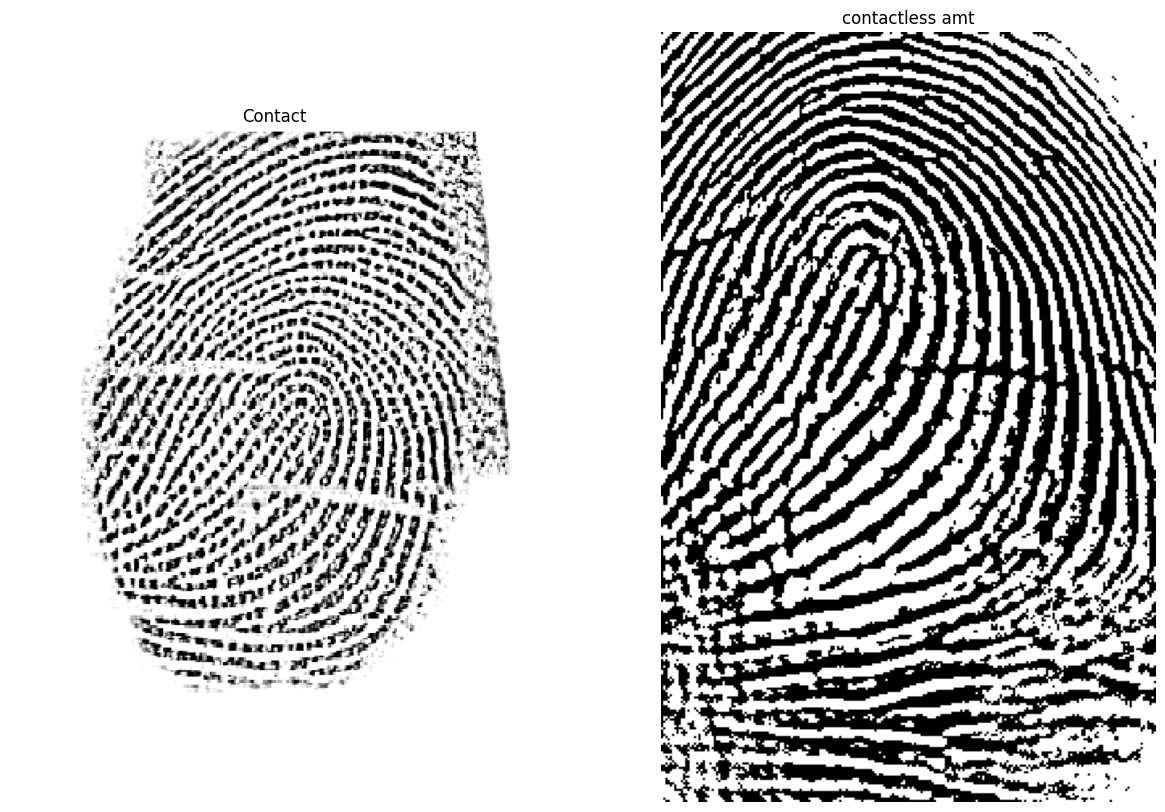

In [5]:
AMT_image_rotated = cv2.rotate(AMT_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
AMT_image_mirrored = cv2.flip(AMT_image_rotated, 1) 

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(contact_image_gray, cmap='gray')
plt.title('Contact')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(AMT_image_mirrored, cmap='gray')
plt.title('contactless amt')
plt.axis('off')
plt.show()

In [6]:
# import fingerprint_feature_extractor
# FeaturesTerminations, FeaturesBifurcations = fingerprint_feature_extractor.extract_minutiae_features(contact_image_gray, spuriousMinutiaeThresh=10, invertImage=False, showResult=True, saveResult=True)
# print('Terminations',FeaturesTerminations)
# print('Bifurcations',FeaturesBifurcations)